In [22]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score , ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from sklearn import metrics

%matplotlib inline

# Load the Data

In [23]:
df = pd.read_csv('ashwaq.csv')

<Axes: >

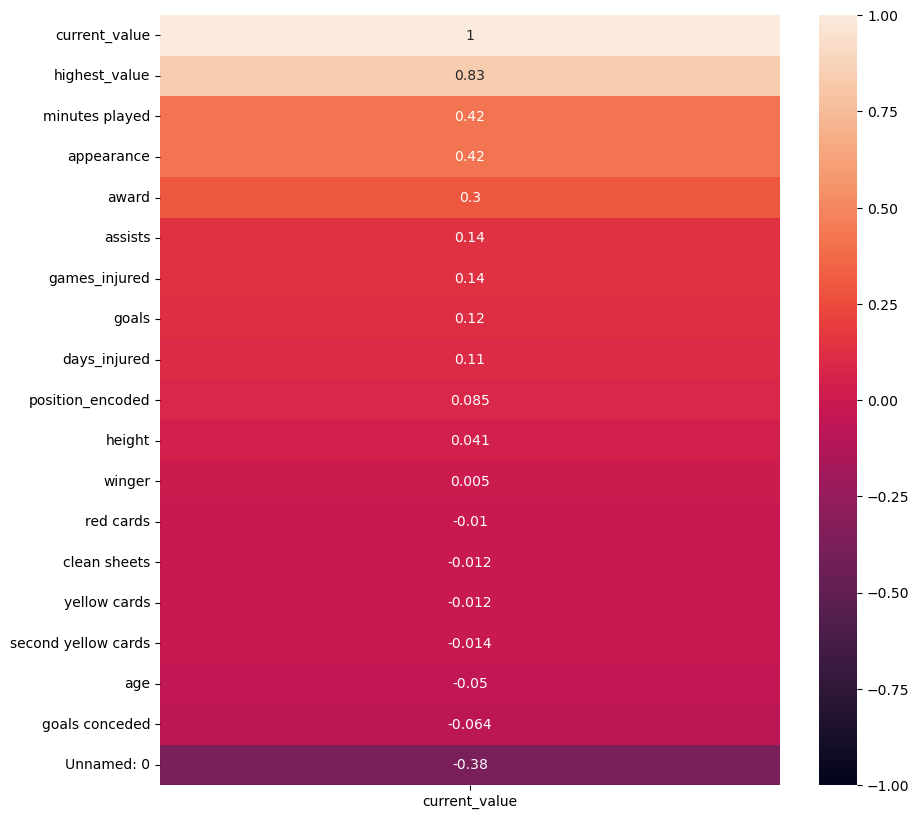

In [24]:
numeric =  df.select_dtypes(include=['number'])
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(numeric.corr()[['current_value']].sort_values('current_value', ascending = False),
vmin = -1, vmax = +1, annot = True, ax = ax)

# Preprocess the Data

In [25]:
# Drop the 'position_encoded' column because there is another column with the same meaning
df.drop(['position_encoded'], axis=1, inplace=True)

# Keeping the original 'position' column intact for further encoding steps

In [26]:
df

,Unnamed: 0,player,team,name,position,height,age,appearance,goals,assists,...,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
0,0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,...,0.000000,1.217252,0.335463,9390,42,5,13,15000000,70000000,0
1,1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,...,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,0
2,2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,...,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,0
3,3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,...,0.000000,0.000000,0.000000,6408,175,22,9,50000000,50000000,0
4,4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,...,0.000000,0.000000,0.000000,5031,238,51,21,40000000,80000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,...,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,1
10750,10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,...,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,0
10751,10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,...,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,0
10752,10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,...,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,0


In [27]:
# Split all features into categorical and numeric
categorical_features = ['team','position']
numeric_features = ['height' , 'age','appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','minutes played','days_injured','games_injured',
                    'award','current_value','highest_value','winger']

In [28]:
# Loop through all categorical features and print the value counts for each
for i in categorical_features:
    print (df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


In [29]:
# Get the counts of each category in 'team'
team_counts = df['team'].value_counts()  
# Keep only rows where the 'team' count is greater than or equal to 2
df = df[df['team'].isin(team_counts[team_counts >= 2].index)]  

In [30]:
# one hot encoding for categorical_features
df = pd.get_dummies(df, columns = categorical_features, drop_first=True)

In [31]:
df.shape

(10754, 408)

In [32]:
p33 = df['current_value'].quantile(0.33)  # Lower than 33rd percentile
p66 = df['current_value'].quantile(0.66)  # Medium: Between 33rd and 66th percentile



def categorize_values(value):
    if value <= p33:
        return 'Low'
    elif p33 < value <= p66:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
df['current_value_category'] = df['current_value'].apply(categorize_values)

df.drop('current_value', axis=1, inplace=True)

In [15]:
df[['current_value_category']]

,current_value_category
0,High
1,Medium
2,Medium
3,High
4,High
...,...
10749,Low
10750,Low
10751,Low
10752,Low


In [33]:
df['current_value_category'].value_counts()

current_value_category
Low       3725
High      3536
Medium    3493
Name: count, dtype: int64

In [34]:
encoder = LabelEncoder()
df['current_value_category_encoded'] = encoder.fit_transform(df['current_value_category']) 

In [35]:
correlation = df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded    1.000000
Unnamed: 0                        0.341840
age                               0.090256
team_Querétaro FC                 0.046216
team_FC Pari Nizhniy Novgorod     0.044743
                                    ...   
games_injured                    -0.101015
award                            -0.152961
minutes played                   -0.277696
appearance                       -0.291350
highest_value                    -0.395944
Name: current_value_category_encoded, Length: 406, dtype: float64


<Axes: >

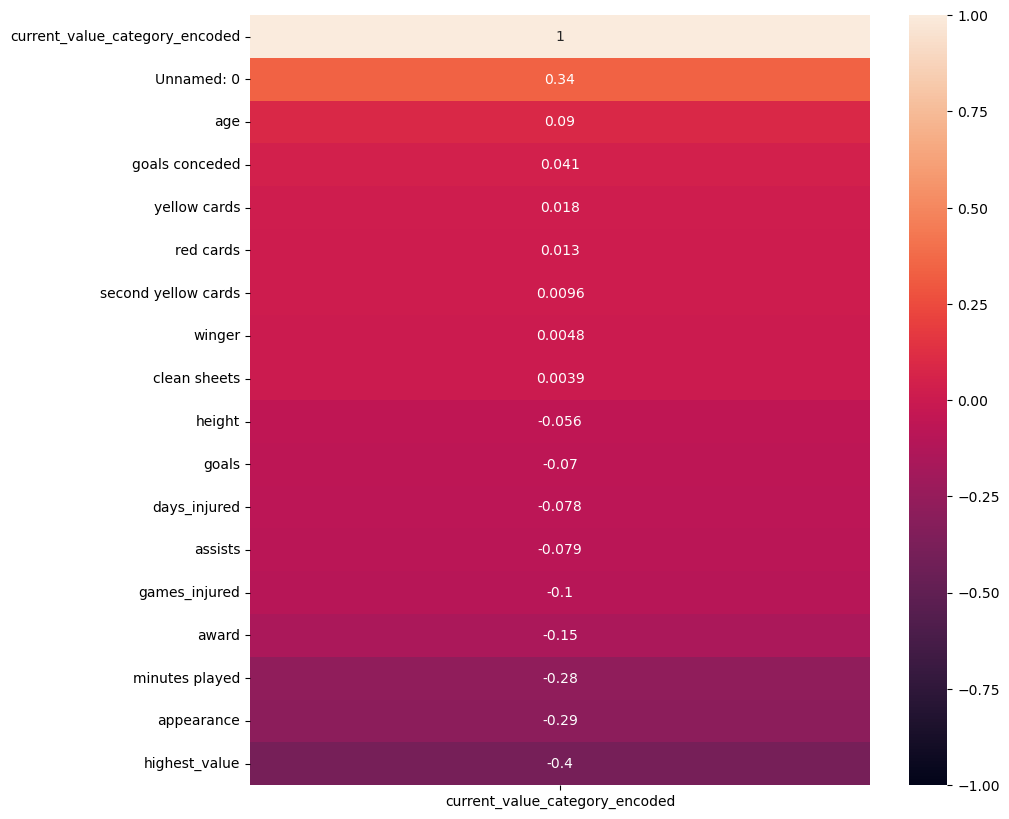

In [36]:
numeric =  df.select_dtypes(include=['number'])
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(numeric.corr()[['current_value_category_encoded']].sort_values('current_value_category_encoded', ascending = False),
vmin = -1, vmax = +1, annot = True, ax = ax)

In [37]:
df.drop('current_value_category', axis=1, inplace=True)

In [38]:
# Prepare data
X = df.drop(['current_value_category_encoded'], axis=1)
y = df['current_value_category_encoded']


# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: '/min-seog-kim/profil/spieler/824340'

In [ ]:
X.shape

# Build the Decision Tree

In [ ]:
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

In [ ]:
param_grid = {
    'max_depth': [4, 5, 6, 7, 10, 15],   # Regularization strength
    'n_estimators':[35, 40, 50, 60]
}
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

# Train the Decision Tree

In [ ]:
dt_classifier.fit(X_train, y_train)

In [ ]:
rf_classifier.fit(X_train, y_train)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_model = grid_search.best_estimator_

# Test the models

In [ ]:
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf_g = best_model.predict(X_test)

# Evaluating the Models 

In [ ]:
# our benchmark model
base_model = round(df['current_value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

In [ ]:
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy
# The Decision Tree achieved an accuracy of 82% on the test set.

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy
# The Random Forest achieved an accuracy of 83% on the test set, which is 1% higher than the Decision Tree.

In [ ]:
y_pred_train_dt = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_dt)
accuracy
# It seems like there is overfitting, as the model achieves perfect accuracy on the training set.

In [ ]:
y_pred_train_rf = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf)
accuracy
# It seems like there is overfitting, as the model achieves perfect accuracy on the training set.

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf_g)
accuracy
# The Random Forest achieved an accuracy of 83% on the test set, which is 1% higher than the Decision Tree.

In [ ]:
y_pred_train_rf_g = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf_g)
accuracy

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf_g)
conf_matrix

In [ ]:
print(classification_report(y_test,
                      y_pred_rf_g,
                      labels=list(best_model.classes_)))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_g,
                                        display_labels=best_model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate Precision
precision = precision_score(y_test, y_pred_rf_g, average='macro')
print(f"Precision: {precision:.2f}")

In [ ]:
# Calculate Recall
recall = recall_score(y_test, y_pred_rf_g, average='macro')
print(f"Recall: {recall:.2f}")

In [ ]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf_g, average='macro')
print(f"F1 Score: {f1:.2f}")

In [ ]:
# Feature importance from Random Forest
feature_importances = best_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()